# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [36]:
# Gráfico
!pip install matplotlib
# Gráfico
!pip install seaborn 
# Inteligência Artificial(machine learning)
!pip install scikit-learn 

In [37]:
import pandas as pd

base = pd.read_csv("advertising.csv")
display(base)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

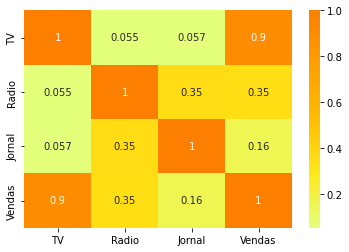

In [38]:
import matplotlib.pyplot as plt # mostrar gráfico
import seaborn as sns # facilita criar gráfico

#Criar gráfico
sns.heatmap(base.corr(), cmap= "Wistia", annot = True)

#Exibir gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [39]:
y = base["Vendas"] #informações para prever
x = base[["TV", "Radio", "Jornal"]] #informações para usar para fazer previsão

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [41]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9648675322622985


#### Visualização Gráfica das Previsões

,y_teste,Previsao Regressao Linear,Previsao ArvoreDeDecisao
58,23.8,21.288161,21.288161
40,16.6,18.042132,18.042132
34,11.9,10.059590,10.059590
102,19.8,21.082241,21.082241
184,17.6,20.764760,20.764760
198,25.5,24.471874,24.471874
95,16.9,16.806436,16.806436
4,17.9,15.628857,15.628857
29,10.5,10.124799,10.124799
168,17.1,18.846019,18.846019


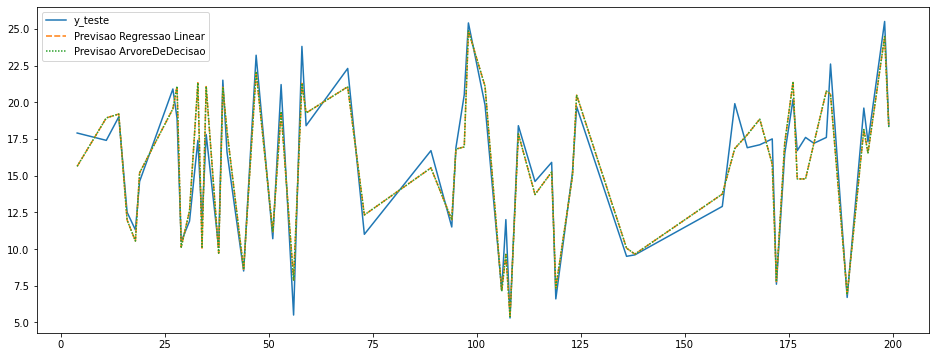

In [44]:
#arvore de decisão é o melhor modelo pois tem maior correlação 96%
base_auxiliar = pd.DataFrame()
base_auxiliar["y_teste"] = y_teste
base_auxiliar["Previsao Regressao Linear"] = previsao_regressaolinear
base_auxiliar["Previsao ArvoreDeDecisao"] = previsao_regressaolinear

display(base_auxiliar)

plt.figure(figsize=(16, 6))
sns.lineplot(data= base_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [43]:
# importar a tabela com as novas informações de previsão

nova_base = pd.read_csv("novos.csv")
print(nova_base)

# usando modelo de arvode de decisao fazendo um .predict com ele
previsao = modelo_arvoredecisao.predict(nova_base)
print(previsao)

      TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0
[ 7.565  8.474 20.311]
